# Week 10 - Neural Networks

## Representing Logic Gates as a Classification Problem
---

Logic gates can be modeled as a classification problem where the input data point is classified into either class '0' representing boolean output 0 or class '1' representing boolean output 1.

![alt text](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Logic-Gates.png)

<br> For example, the following figure shows how AND gate can be represented as a classification problem. <br>

![and-gate-classification](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6HtfY93_f0PLy-MS5UTogRNmrtptQsU3iHXEbQd4_q79eRfVd)

<br> The figure shows one possible decision boundary that will perform the task. 

### 1) Using logistic regression implement OR gate such that $\hat{y} = OR(x_1, x_2)$ where $x_1$ and $x_2$ are boolean inputs to the gate and $\hat{y}$ is the boolean output from the gate. Plot the data points and the decision boundary, mention which class each decision region represents.

predicted values
[0. 1. 1. 1.]

weights are :
w1 : 1
w2 : 1
bias : -0.5


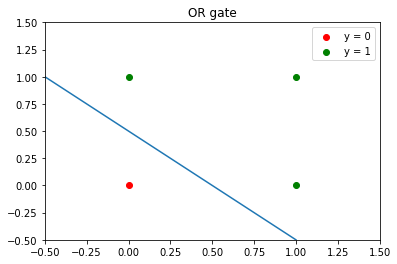

In [18]:
# Code here. Use additional text cells if required.
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def sigmoid(u):
    return (1/(1+np.exp(-u)))

x1 = [i//2 for i in range(4)]
x1 = np.array(x1)
x2 = [i%2 for i in range(4)]
x2 = np.array(x2)

y = np.array([0,1,1,1])

# weights
w = np.array([1,1])
b = -0.5
# prediction
probabs = sigmoid(w[0]*x1 + w[1]*x2 + b)
# print(probabs)
y_hat = np.round(probabs)
print("predicted values")
print(y_hat)

# printing weights
print("\nweights are :")
print("w1 :",w[0])
print("w2 :",w[1])
print("bias :", b)

# plot
plt.figure()
plt.scatter(x1[y == 0],x2[y == 0], c = 'r', label = "y = 0")
plt.scatter(x1[y == 1],x2[y == 1], c = 'g',label = "y = 1")
# classifier y_hat = sigmoid(w.T*X + b)
plt.plot([-0.5,1],[1,-0.5])
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.legend(loc = 1)
plt.title("OR gate")
plt.show()
# print(x1[y == 1])


## Single-Layer Perceptron
---

 The following image represents the architecture of a single-layer perceptron.

![single-layer-perceptron](https://www.simplilearn.com/ice9/free_resources_article_thumb/general-diagram-of-perceptron-for-supervised-learning.jpg)

### 2) Now implement OR gate using a single-layer perceptron with step-function as activation. Specify one set of weights $w_1, w_2$ and bias $b$ that will perform this task. Plot the data points and the decision boundary, mention which class each decision region represents.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`.

prediction by step function :
[0. 1. 1. 1.]

weights are :
w1 : 0.4
w2 : 0.4
bias : 0.8


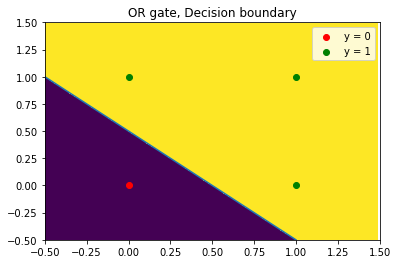

In [4]:
# Code here. Use additional text cells if required.
# y_hat = step(W.T*X + b)

def step(x1,x2,w1,w2,b):
    return(np.floor(w1*x1 + w2*x2 + b))

w1 = 0.4
w2 = 0.4
b = 0.8

y_hat = step(x1,x2,w1,w2,b)
print("prediction by step function :")
print(y_hat)

# printing weights
print("\nweights are :")
print("w1 :",w1)
print("w2 :",w2)
print("bias :", b)

# Decision boundary
xx, yy = np.meshgrid(np.arange(-0.5,1.5,0.01),np.arange(-0.5,1.5,0.01))
Z = step(xx.ravel(),yy.ravel(),w1,w2,b)
Z = Z.reshape(xx.shape)
plt.figure()
# for boundary
plt.pcolormesh(xx,yy,Z)
plt.scatter(x1[y == 0],x2[y == 0], c = 'r', label = "y = 0")
plt.scatter(x1[y == 1],x2[y == 1], c = 'g',label = "y = 1")
# classifier y_hat = sigmoid(w.T*X + b)
plt.plot([-0.5,1],[1,-0.5])
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.legend(loc = 1)
plt.title("OR gate, Decision boundary")
plt.show()

### 3) Do you observe any similarities between logistic regression and single-layer perceptron? What activation function should be used in the perceptron to get the same functionality as logistic regression?

## Ans :
- Single layered perceptron and logistic regression uses linear function to calculate probabilities.
- When the activation function used in the single layered perceptron is **sigmoid** , it is equivalent to logistic regression.

### 4) Now implement AND gate using a single-layer perceptron with step-function as activation. Specify one set of weights $w_1, w_2$ and bias $b$ that will perform this task. Plot the data points and the decision boundary, mention which class each decision region represents.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`.

prediction by step function :
[0. 0. 0. 1.]

weights are :
w1 : 0.4
w2 : 0.4
bias : 0.4


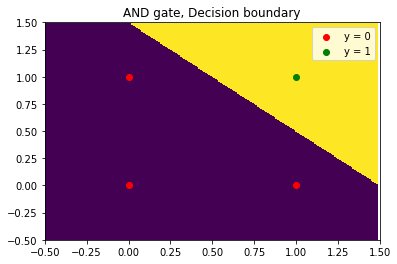

In [5]:
# Code here. Use additional text cells if required.
# y_hat = step(W.T*X + b)

x1 = [i//2 for i in range(4)]
x1 = np.array(x1)
x2 = [i%2 for i in range(4)]
x2 = np.array(x2)

y = np.array([0,0,0,1])

# activation function
def step(x):
    return(np.floor(x))

def perceptron(x1,x2,w1,w2,b):
    return(step(w1*x1 + w2*x2 + b))

w1 = 0.4
w2 = 0.4
b = 0.4

y_hat = perceptron(x1,x2,w1,w2,b)
print("prediction by step function :")
print(y_hat)

# printing weights
print("\nweights are :")
print("w1 :",w1)
print("w2 :",w2)
print("bias :", b)

# Decision boundary
xx, yy = np.meshgrid(np.arange(-0.5,1.5,0.01),np.arange(-0.5,1.5,0.01))
Z = perceptron(xx.ravel(),yy.ravel(),w1,w2,b)
Z = Z.reshape(xx.shape)
plt.figure()
# for boundary
plt.pcolormesh(xx,yy,Z)
plt.scatter(x1[y == 0],x2[y == 0], c = 'r', label = "y = 0")
plt.scatter(x1[y == 1],x2[y == 1], c = 'g',label = "y = 1")
# classifier y_hat = sigmoid(w.T*X + b)
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.legend(loc = 1)
plt.title("AND gate, Decision boundary")
plt.show()

### 5) Can you construct an XOR gate similarly using a single-layer perceptron? Explain your answer.

## Ans :
- No, we can't construct XOR gate using single layer perceptron.
- Because the decision boundary of XOR is non-linear.

## Multi-Layer Perceptron

---

The following image represents the architecture of a multi-layer perceptron with a singe hidden layer.
![alt text](https://missinglink.ai/wp-content/uploads/2018/11/multilayer-perceptron.png)
<br> Similarly we can introduce multiple hidden layers of different sizes to form a neural network.

### 6) Now implement XOR gate using a multi-layer perceptron with one hidden layer of two neurons and step function as activation, such that $\hat{y} = XOR(x_1, x_2)$ where $x_1$ and $x_2$ are boolean inputs to the gate and $\hat{y}$ is the boolean output from the gate.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`. <br> <br> Plot and visualize the decision boundary for each neuron in the network (with respect to the inputs $x_1$ and $x_2$, in the same plot) and specify which class each region represents. <br> <br> Hint: Decompose the XOR gate into basic gates of OR, AND and NOT and manually define weights accordingly. (refer to the link provided in the reading material) 

XOR gate output :
[0. 1. 1. 0.]


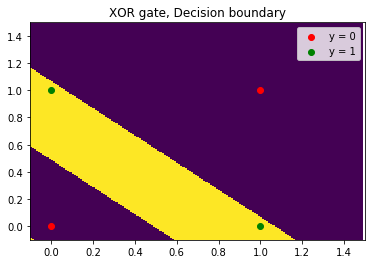

In [6]:
# Code here. Use additional text cells if required.
# let z1 and z2 be the two neurons in hidden layer

y = np.array([0,1,1,0])

# activation function
def step(x):
    return(np.floor(x))

# perceptron
def perceptron(x1,x2,w1,w2,b):
    return(step(w1*x1 + w2*x2 + b))
    
# input weights
w00 = 0.41
w01 = -0.8
b0 = 0.8
w10 = 0.41
w11 = -0.8
b1 = 1.85

# hidden layer weights
w1 = 0.4
w2 = 0.4
b2 = 0.5

# Hidden layer
# OR gate
Z1 = perceptron(x1,x2, w00,w10,b0)
# not OR gate
Z2 = perceptron(x1,x2,w01,w11,b1)

# output layer
# OR and not OR
Y_hat = perceptron(Z1,Z2,w1,w2,b2)
print("XOR gate output :")
print(Y_hat)

# Decision boundary
xx, yy = np.meshgrid(np.arange(-0.1,1.5,0.01),np.arange(-0.1,1.5,0.01))
Z1 = perceptron(xx.ravel(),yy.ravel(), w00,w10,b0)
Z2 = perceptron(xx.ravel(),yy.ravel(), w01,w11,b1)
Z = perceptron(Z1, Z2, w1,w2 ,b2)
Z = Z.reshape(xx.shape)

plt.figure()
# for boundary
plt.pcolormesh(xx,yy,Z)
plt.scatter(x1[y == 0],x2[y == 0], c = 'r', label = "y = 0")
plt.scatter(x1[y == 1],x2[y == 1], c = 'g',label = "y = 1")
# classifier y_hat = sigmoid(w.T*X + b)
plt.xlim(-0.1,1.5)
plt.ylim(-0.1,1.5)
plt.legend(loc = 1)
plt.title("XOR gate, Decision boundary")
plt.show()

### 7) From what you observed in the above exercises, explain what drawback of single-layer perceptron can be overcome by multi-layer perceptron using hidden layers.

- we cannot fit a non linear classifier also using single - layer perceptron, this can be overcome by multi-layer perceptron using hidden layers. As we did in outputing XOR gate.

## MLP Classification on Synthetic Dataset
---

### 8) Load the synthetic dataset from '`synth_data_train.npz`' and `'synth_data_test.npz'` containing train and test data. Visualize the data in a 2D plot. <br> Note: `mglearn.discrete_scatter(x1, x2, y)` from `mglearn` library provides good visualization

Attributes present in the given files
['X', 'y']

Visualizing the dataset


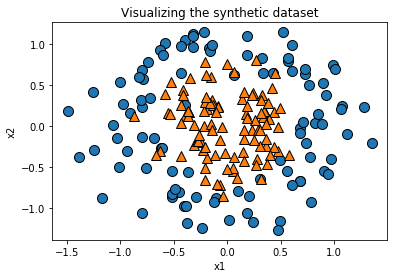

In [108]:
# Code here. Use additional text cells if required.
import mglearn
data_train = np.load('synth_data_train.npz')
data_test = np.load('synth_data_test.npz')
print("Attributes present in the given files")
print(data_train.files)

# data
X_train = data_train.f.X
Y_train = data_train.f.y
X_test = data_test['X']
Y_test = data_test['y']

X_data = np.concatenate((X_train,X_test),axis = 0)
Y_data = np.append(Y_train,Y_test)

# visualization
print("\nVisualizing the dataset")
plt.figure()
mglearn.discrete_scatter(X_data[:,0],X_data[:,1],Y_data)
plt.title("Visualizing the synthetic dataset")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 9) Using `MLPClassifier` from `scikit-learn` library, fit a binary classifier to the given data. Use `max_iter=1000`, `random_state=0` and the rest as default parameters for the classifier.

### Visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier (in the same plot). <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### Report the train and test score of the above classifier on the given train and test data.

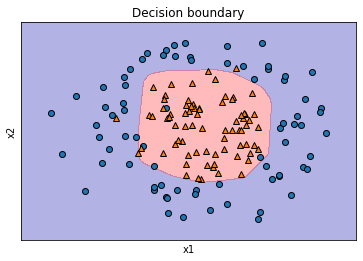

Train score : 0.9533333333333334
Test score : 0.8


In [109]:
# Code here. Use additional text cells if required.
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter = 1000, random_state = 0)
clf.fit(X_train,Y_train)

# visualizing
plt.figure()
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train,s = 6)
mglearn.plots.plot_2d_separator(clf,X_train, fill = True, alpha = 0.3)
plt.xlabel("x1")
plt.ylabel('x2')
plt.title('Decision boundary')
plt.show()

# scores
print("Train score :", clf.score(X_train,Y_train))
print("Test score :", clf.score(X_test,Y_test))

### 10) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using a single hidden layer of size <br>(i) 2 (ii) 3 (iii) 5 (iv) 7 (v) 10 (vi) 15. <br>Use `max_iter=3000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

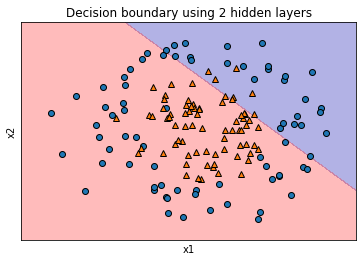

Train score for 2 hidden layers: 0.6266666666666667
Test score for 2 hidden layers: 0.64


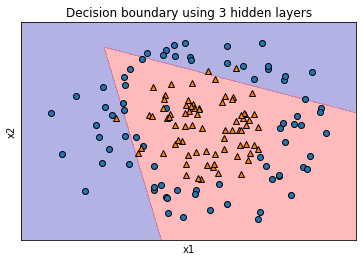

Train score for 3 hidden layers: 0.6933333333333334
Test score for 3 hidden layers: 0.68


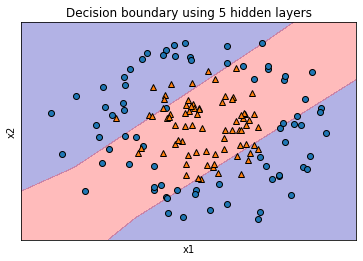

Train score for 5 hidden layers: 0.72
Test score for 5 hidden layers: 0.66


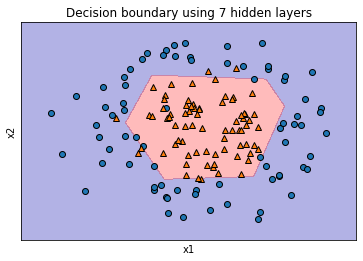

Train score for 7 hidden layers: 0.9266666666666666
Test score for 7 hidden layers: 0.82


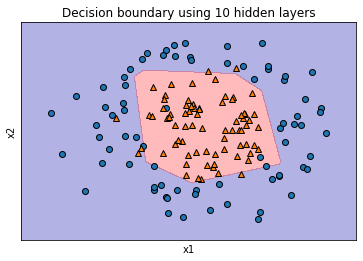

Train score for 10 hidden layers: 0.94
Test score for 10 hidden layers: 0.86


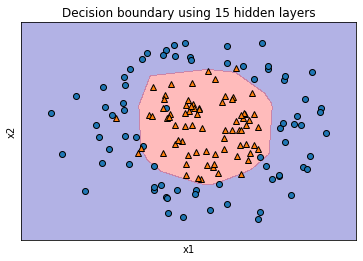

Train score for 15 hidden layers: 0.96
Test score for 15 hidden layers: 0.82


In [110]:
# Code here. Use additional text cells if required.
hidden_layers = [2,3,5,7,10,15]
for h in hidden_layers:
    clf = MLPClassifier(max_iter = 3000, random_state = 0, hidden_layer_sizes = h)
    clf.fit(X_train,Y_train)

    # visualizing
    plt.figure()
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train,s = 6)
    mglearn.plots.plot_2d_separator(clf,X_train, fill = True, alpha = 0.3)
    plt.xlabel("x1")
    plt.ylabel('x2')
    plt.title('Decision boundary using '+str(h)+' hidden layers')
    plt.show()

    # scores
    print("Train score for "+str(h)+" hidden layers:", clf.score(X_train,Y_train))
    print("Test score for "+str(h)+" hidden layers:", clf.score(X_test,Y_test))

### 11) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using <br>(a) one hidden layer of size 15 <br>(b) two hidden layers each of size 5 <br>(c) three hidden layers each of size 5. <br>Use `max_iter=2000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

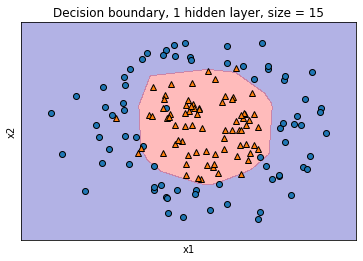

Train score, using 1 hidden layer, size = 15 : 0.96
Test score, using 1 hidden layer, size = 15 : 0.82


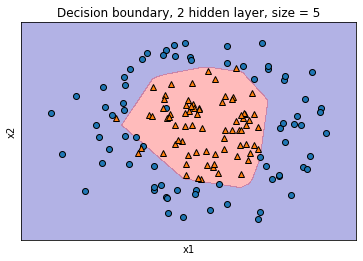

Train score, using 2 hidden layer, each size = 5 : 0.9533333333333334
Test score, using 2 hidden layer, each size = 5 : 0.84


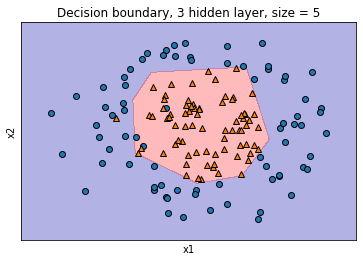

Train score, using 3 hidden layer, each size = 5 : 0.9733333333333334
Test score, using 3 hidden layer, each size = 5 : 0.78


In [111]:
# Code here. Use additional text cells if required.
# a - one hiddenlayer, size = 15
clf = MLPClassifier(max_iter = 2000, random_state = 0, hidden_layer_sizes = 15)
clf.fit(X_train,Y_train)

# visualizing
plt.figure()
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train,s = 6)
mglearn.plots.plot_2d_separator(clf,X_train, fill = True, alpha = 0.3)
plt.xlabel("x1")
plt.ylabel('x2')
plt.title('Decision boundary, 1 hidden layer, size = 15')
plt.show()

# scores
print("Train score, using 1 hidden layer, size = 15 :", clf.score(X_train,Y_train))
print("Test score, using 1 hidden layer, size = 15 :", clf.score(X_test,Y_test))

# b - two hiddenlayer, each size = 5
clf = MLPClassifier(max_iter = 2000, random_state = 0, hidden_layer_sizes = [5,5])
clf.fit(X_train,Y_train)

# visualizing
plt.figure()
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train,s = 6)
mglearn.plots.plot_2d_separator(clf,X_train, fill = True, alpha = 0.3)
plt.xlabel("x1")
plt.ylabel('x2')
plt.title('Decision boundary, 2 hidden layer, size = 5')
plt.show()

# scores
print("Train score, using 2 hidden layer, each size = 5 :", clf.score(X_train,Y_train))
print("Test score, using 2 hidden layer, each size = 5 :", clf.score(X_test,Y_test))


# c - three hiddenlayer, each size = 5
clf = MLPClassifier(max_iter = 2000, random_state = 0, hidden_layer_sizes = (5,5,5))
clf.fit(X_train,Y_train)

# visualizing
plt.figure()
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train,s = 6)
mglearn.plots.plot_2d_separator(clf,X_train, fill = True, alpha = 0.3)
plt.xlabel("x1")
plt.ylabel('x2')
plt.title('Decision boundary, 3 hidden layer, size = 5')
plt.show()

# scores
print("Train score, using 3 hidden layer, each size = 5 :", clf.score(X_train,Y_train))
print("Test score, using 3 hidden layer, each size = 5 :", clf.score(X_test,Y_test))

### 12) From your observations in the above exercises, what is the effect of adding more hidden layers and how is it different from adding more neurons to the same hidden layer?

- Adding one more neuron to the hidden layer increases the number of lines of the decision boundary by one.
- If we add more hidden layers, it connects the lines created in the previous hidden layer.

### Activation Functions<br>
The following image shows some basic and commonly used activation functions.
![alt text](https://www.kdnuggets.com/wp-content/uploads/activation.png)

### 13) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using one hidden layer of size 10 and activation function as <br>(a) identity <br>(b) sigmoid <br>(c) tanh <br>(d) relu. <br>Use `max_iter=2000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

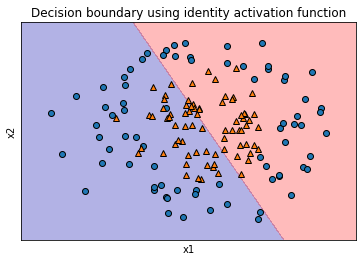

Train score for identity activation function: 0.52
Test score for identity activation function: 0.5


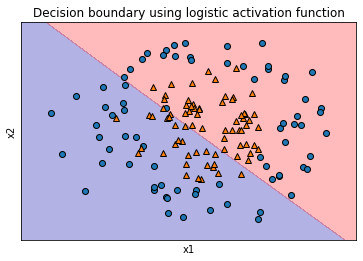

Train score for logistic activation function: 0.5466666666666666
Test score for logistic activation function: 0.48


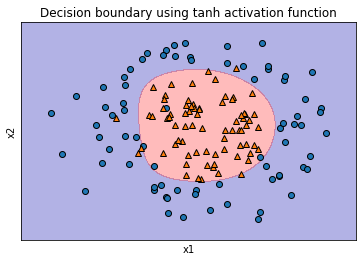

Train score for tanh activation function: 0.94
Test score for tanh activation function: 0.82


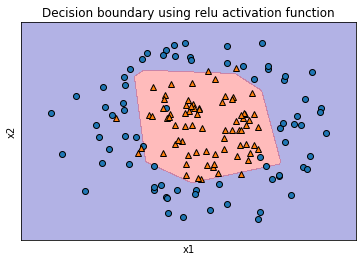

Train score for relu activation function: 0.94
Test score for relu activation function: 0.86


In [112]:
# Code here. Use additional text cells if required.
AF = ['identity', 'logistic', 'tanh', 'relu']
for af in AF:
    clf = MLPClassifier(max_iter = 2000, random_state = 0, hidden_layer_sizes = 10, activation = af)
    clf.fit(X_train,Y_train)

    # visualizing
    plt.figure()
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train,s = 6)
    mglearn.plots.plot_2d_separator(clf,X_train, fill = True, alpha = 0.3)
    plt.xlabel("x1")
    plt.ylabel('x2')
    plt.title('Decision boundary using '+af+" activation function")
    plt.show()

    # scores
    print("Train score for "+af+" activation function:", clf.score(X_train,Y_train))
    print("Test score for "+af+" activation function:", clf.score(X_test,Y_test))

### 14) Which activation function gives the best classifier for the given dataset and why? Are there any drawbacks in using the other activation functions?

- *relu* activation function gives the best classifier for the given dataset, because it captures the non-linear decision boundary well using straight lines (i.e. it generalizes well).
- Even *tanh* is able to capture the decision boundary.
- other activation functions were not able to capture the nonlinear decision boundary, they are just classifying using a single straight line.

## MLP Classification on MNIST Dataset
---

### 15) Load the MNIST dataset from `sklearn.datasets.fetch_openml`. Visualize the data.

In [113]:
# Code here. Use additional text cells if required.
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784', version=1)
X_data = data.data
Y_data = data.target



Sample images in the dataset are :


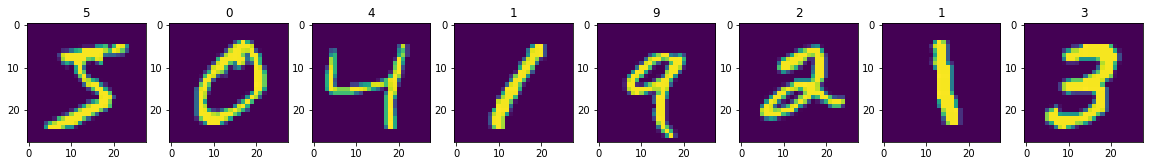

In [114]:
# visualizing the data
image = np.reshape(X_data,(X_data.shape[0],28,28))
print("Sample images in the dataset are :")
plt.figure(figsize = (20,10))
for i in range(8):
    plt.subplot(1,8, i+1)
    plt.imshow(image[i])
    plt.title(Y_data[i])
plt.show()

### 16) Fit an `MLPClassifier` with one hidden layer of 50 neurons (use `max_iter=20`, `alpha=1e-4`, `solver='sgd'`, `tol=1e-4`, `random_state=1`) <br> Visualize the weights of the hidden layer. <br>Hint: For each neuron in the hidden layer, reshape the weights to form a 28x28 grid and visualize them.

In [115]:
# Code here. Use additional text cells if required.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.25)

clf = MLPClassifier(hidden_layer_sizes = 50, max_iter = 20, alpha=1e-4, solver='sgd', tol=1e-4, random_state=1)
clf.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

visualizing a few sample weights


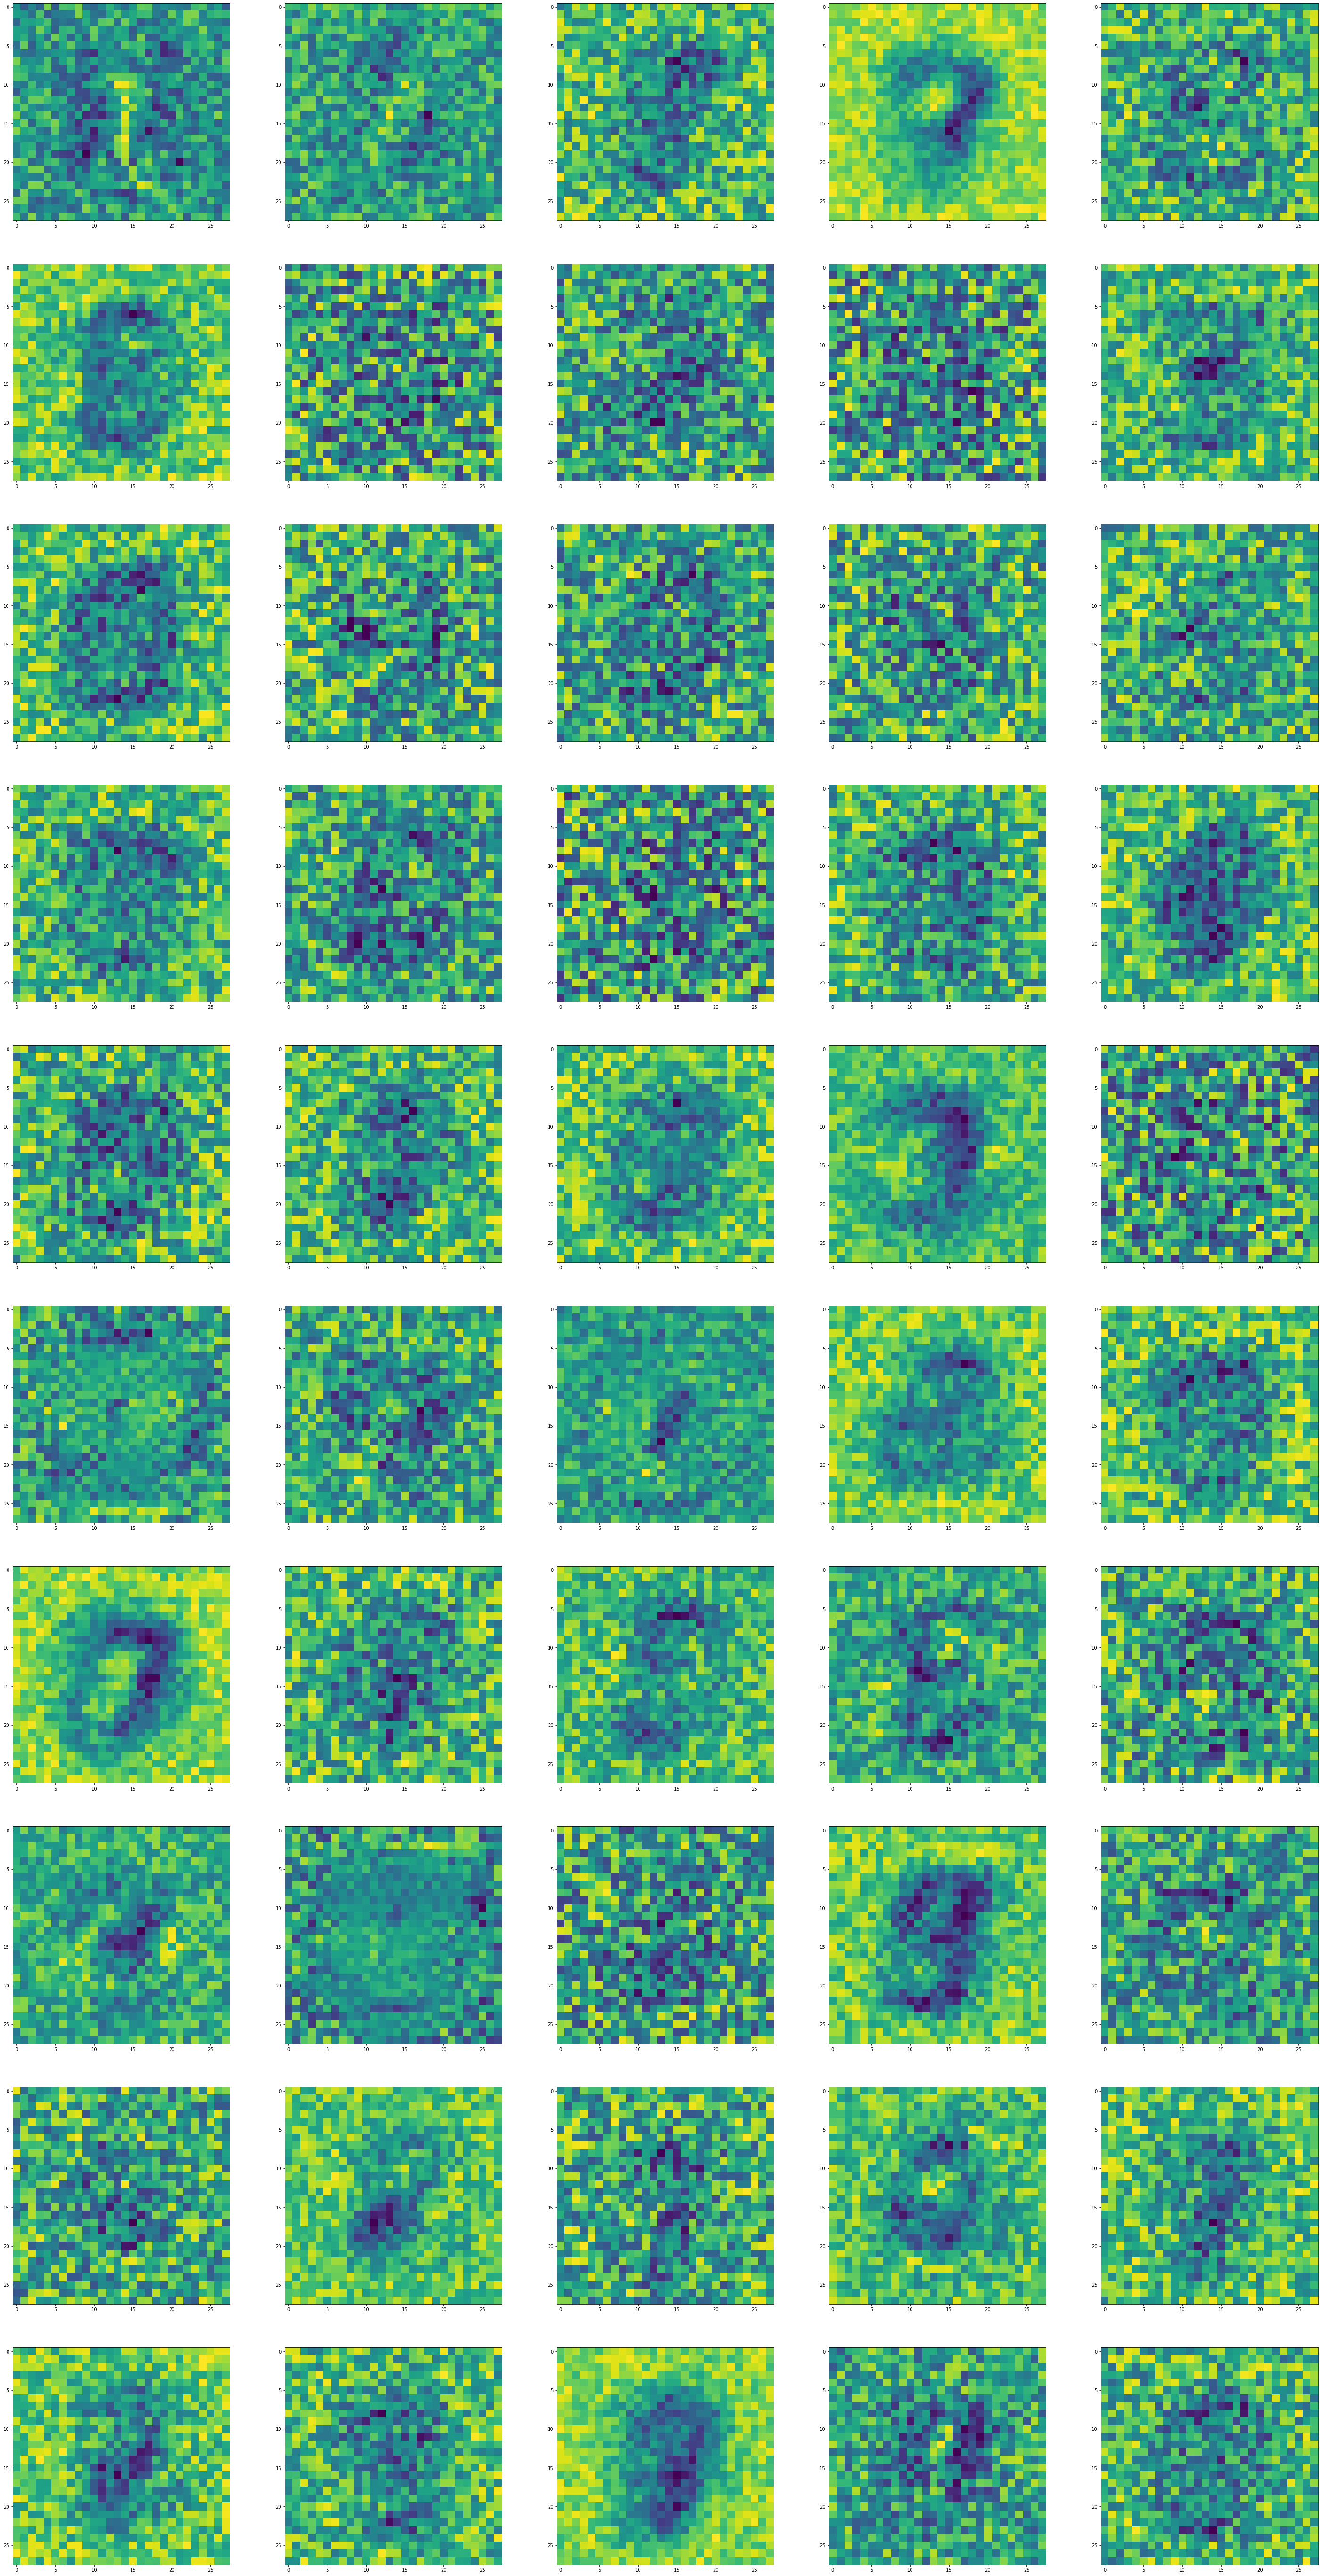

In [120]:
# ploting a few sample weights
plt.figure(figsize = (50, 100))
print("visualizing a few sample weights")

for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(clf.coefs_[0][:,i].reshape(28,28))
plt.show()

### 17) What patterns do you observe in the weights that you visualized? Explain why you think these patterns are formed?

- we observe discrete lines and curves sort of patterns.
- I think they act as filters for evaluating a specific feature of the data point.(in other words if a data point when passed though the weights the output tells us which digit it belongs to.)

### 18) Experiment with different parameters of the `MLPClassifier`. You can vary the number of hidden layers, number of neurons in each hidden layer and activation function used for the hidden layers. <br> Report the train and test scores and confusion matrix for each of the cases.

In [99]:
# Code here. Use additional text cells if required.
# using different set of parameters
hidden_layers = [1,2,3,4,5]
n_neurons = [10,20,40,50]
AF = ['identity', 'logistic', 'tanh', 'relu']
for neuron in n_neurons:
    for n_hid in hidden_layers:
        for af in AF:
            clf = MLPClassifier(hidden_layer_sizes = [neuron]*n_hid, activation = af, max_iter = 20, alpha=1e-4)
            clf.fit(X_train,Y_train)
            # scores
            print('\n'+str(n_hid)+" hidden layers, "+str(neuron)+" neurons per layer, activation = "+af+'\n')
            print("train score :",clf.score(X_train,Y_train))
            print("test score :",clf.score(X_test,Y_test))


1 hidden layers, 10 neurons per layer, activation = identity

train score : 0.37333333333333335
test score : 0.44

1 hidden layers, 10 neurons per layer, activation = logistic

train score : 0.56
test score : 0.58

1 hidden layers, 10 neurons per layer, activation = tanh

train score : 0.54
test score : 0.58

1 hidden layers, 10 neurons per layer, activation = relu

train score : 0.5
test score : 0.5

2 hidden layers, 10 neurons per layer, activation = identity

train score : 0.5666666666666667
test score : 0.62

2 hidden layers, 10 neurons per layer, activation = logistic

train score : 0.5
test score : 0.5

2 hidden layers, 10 neurons per layer, activation = tanh

train score : 0.6
test score : 0.56

2 hidden layers, 10 neurons per layer, activation = relu

train score : 0.5
test score : 0.5

3 hidden layers, 10 neurons per layer, activation = identity

train score : 0.4266666666666667
test score : 0.5

3 hidden layers, 10 neurons per layer, activation = logistic

train score : 0.5


### 19) Which one of the above do you think is the optimal model? Give reasons. Report the train-test scores and confusion matrix.

### Comments:
- I think the model with **relu** activation function, with 3 to 5 hidden layers and around 40 to 50 neurons per layer works better, because the digits like 2, 3, 6, 8, 9 have so many curves, to make a lines pattern represent them, requires many neurons, say around 30 to 40.
- to make the line boundaries some what curved, we need need more hidden layers.(i.e. to represent finer details like curves)
- The best model obtained is reported below.

In [101]:
#### The best model was found for 
# 5 hidden layers,
# 50 neurons per layer,
# activation = relu

print('best model parameters :\n')
print('5 hidden layers')
print('50 neurons per layer')
print('activation = relu \n')

# fitting the best parameters
clf = MLPClassifier(hidden_layer_sizes = [50]*5, activation = 'relu', max_iter = 20, alpha=1e-4)
clf.fit(X_train,Y_train)
print("Train score :", clf.score(X_train,Y_train))
print("Test score :", clf.score(X_test, Y_test))

best model parameters :

5 hidden layers
50 neurons per layer
activation = relu 

Train score : 0.94
Test score : 0.88
